In [1]:
!git clone https://github.com/cosmicad/dataset

Cloning into 'dataset'...
remote: Enumerating objects: 713, done.
remote: Total 713 (delta 0), reused 0 (delta 0), pack-reused 713 (from 1)
Receiving objects: 100% (713/713), 7.26 MiB | 11.39 MiB/s, done.
Resolving deltas: 100% (341/341), done.


In [2]:
import xml.etree.ElementTree as ET
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [3]:
image_path = '/content/dataset/JPEGImages/BloodImage_00013.jpg'
xml_path = '/content/dataset/Annotations/BloodImage_00013.xml'

image = Image.open(image_path)
draw = ImageDraw.Draw(image)

tree = ET.parse(xml_path)
root = tree.getroot()

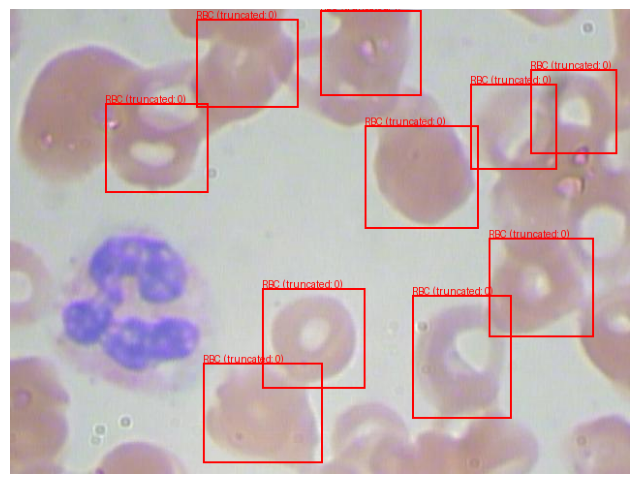

In [4]:
for obj in root.findall('object'):
    name = obj.find('name').text
    truncated = obj.find('truncated').text
    bndbox = obj.find('bndbox')
    xmin = int(bndbox.find('xmin').text)
    ymin = int(bndbox.find('ymin').text)
    xmax = int(bndbox.find('xmax').text)
    ymax = int(bndbox.find('ymax').text)
    draw.rectangle([xmin, ymin, xmax, ymax], outline='red', width=2)
    label = f"{name} (truncated: {truncated})"
    draw.text((xmin, ymin - 10), label, fill='red')


plt.figure(figsize=(8, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

In [5]:
import os
import xml.etree.ElementTree as ET

xml_folder = "/content/dataset/Annotations"
output_folder = "/content/dataset/Annotations"

class_names = ["RBC", "WBC", "Platelets"]

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

def convert_bbox(size, box):
    dw = 1.0 / size[0]
    dh = 1.0 / size[1]
    x = (box[0] + box[1]) / 2.0 - 1
    y = (box[2] + box[3]) / 2.0 - 1
    w = box[1] - box[0]
    h = box[3] - box[2]
    x *= dw
    w *= dw
    y *= dh
    h *= dh
    return (x, y, w, h)

for xml_file in os.listdir(xml_folder):
    if not xml_file.endswith(".xml"):
        continue
    tree = ET.parse(os.path.join(xml_folder, xml_file))
    root = tree.getroot()
    size = root.find("size")
    w = int(size.find("width").text)
    h = int(size.find("height").text)

    with open(os.path.join(output_folder, xml_file.replace(".xml", ".txt")), "w") as f:
        for obj in root.findall("object"):
            cls = obj.find("name").text
            if cls not in class_names:
                continue
            cls_id = class_names.index(cls)
            xmlbox = obj.find("bndbox")
            b = (
                float(xmlbox.find("xmin").text),
                float(xmlbox.find("xmax").text),
                float(xmlbox.find("ymin").text),
                float(xmlbox.find("ymax").text),
            )
            bbox = convert_bbox((w, h), b)
            f.write(f"{cls_id} " + " ".join([f"{a:.6f}" for a in bbox]) + "\n")

print("Conversion completed!")


Conversion completed!


In [6]:
xml_folder = "/content/dataset/Annotations"

for file_name in os.listdir(xml_folder):
    if file_name.endswith(".xml"):
        os.remove(os.path.join(xml_folder, file_name))

print("All XML files have been deleted.")

All XML files have been deleted.


In [7]:
import os

folder_path = '/content/dataset/JPEGImages'

image_extensions = ('.jpg')
num_images = len([file for file in os.listdir(folder_path) if file.lower().endswith(image_extensions)])

print(f"Number of images in the folder: {num_images}")

Number of images in the folder: 366


In [8]:
# 366*0.2

In [9]:
os.chdir("/content/dataset")
!pwd

/content/dataset


In [10]:
os.mkdir("Test_img")
os.mkdir("Test_anno")

In [11]:
# #42 xml
import shutil

for i in range(0, 9):
    source_path = f'/content/dataset/JPEGImages/BloodImage_0000{i}.jpg'
    destination_path = '/content/dataset/Test_img'
    shutil.move(source_path, destination_path)

    source_path = f'/content/dataset/Annotations/BloodImage_0000{i}.txt'
    destination_path = '/content/dataset/Test_anno'
    shutil.move(source_path, destination_path)

for i in range(10, 25):
    source_path = f'/content/dataset/JPEGImages/BloodImage_000{i}.jpg'
    destination_path = '/content/dataset/Test_img'
    shutil.move(source_path, destination_path)

    source_path = f'/content/dataset/Annotations/BloodImage_000{i}.txt'
    destination_path = '/content/dataset/Test_anno'
    shutil.move(source_path, destination_path)

In [12]:
os.mkdir("train")
os.mkdir("val")

In [13]:
import shutil

source = "/content/dataset/Annotations"
destination = "/content/dataset/train"
shutil.move(source, destination)

source = "/content/dataset/JPEGImages"
destination = "/content/dataset/train"
shutil.move(source, destination)

source = "/content/dataset/Test_anno"
destination = "/content/dataset/val"
shutil.move(source, destination)

source = "/content/dataset/Test_img"
destination = "/content/dataset/val"
shutil.move(source, destination)


'/content/dataset/val/Test_img'

In [22]:
current_path = '/content/dataset/train/JPEGImages'
new_path = '/content/dataset/train/images'

try:
    os.rename(current_path, new_path)
    print(f"Successfully renamed '{current_path}' to '{new_path}'")
except FileNotFoundError:
    print(f"Error: The directory '{current_path}' does not exist.")
except FileExistsError:
    print(f"Error: A directory named '{new_path}' already exists.")
except PermissionError:
    print(f"Error: Insufficient permissions to rename '{current_path}'.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


current_path = '/content/dataset/train/Annotations'
new_path = '/content/dataset/train/labels'

try:
    os.rename(current_path, new_path)
    print(f"Successfully renamed '{current_path}' to '{new_path}'")
except FileNotFoundError:
    print(f"Error: The directory '{current_path}' does not exist.")
except FileExistsError:
    print(f"Error: A directory named '{new_path}' already exists.")
except PermissionError:
    print(f"Error: Insufficient permissions to rename '{current_path}'.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


current_path = '/content/dataset/val/Test_img'
new_path = '/content/dataset/val/images'

try:
    os.rename(current_path, new_path)
    print(f"Successfully renamed '{current_path}' to '{new_path}'")
except FileNotFoundError:
    print(f"Error: The directory '{current_path}' does not exist.")
except FileExistsError:
    print(f"Error: A directory named '{new_path}' already exists.")
except PermissionError:
    print(f"Error: Insufficient permissions to rename '{current_path}'.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


current_path = '/content/dataset/val/Test_anno'
new_path = '/content/dataset/val/labels'

try:
    os.rename(current_path, new_path)
    print(f"Successfully renamed '{current_path}' to '{new_path}'")
except FileNotFoundError:
    print(f"Error: The directory '{current_path}' does not exist.")
except FileExistsError:
    print(f"Error: A directory named '{new_path}' already exists.")
except PermissionError:
    print(f"Error: Insufficient permissions to rename '{current_path}'.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Error: The directory '/content/dataset/train/JPEGImages' does not exist.
Error: The directory '/content/dataset/train/Annotations' does not exist.
Error: The directory '/content/dataset/val/Test_img' does not exist.
Error: The directory '/content/dataset/val/Test_anno' does not exist.


In [15]:
os.chdir("/content/dataset")

In [16]:
import yaml

data = {
    "train": "/content/dataset/train/images",
    "val": "/content/dataset/val/images",
    "nc": 3,
    "names": ["RBC", "WBC", "Platelets"]
}

yaml_file_path = "/content/dataset/dataset.yaml"

with open(yaml_file_path, "w") as file:
    yaml.dump(data, file, default_flow_style=False)

print(f"YAML file created successfully at {yaml_file_path}")


YAML file created successfully at /content/dataset/dataset.yaml


In [17]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 15.8 MB/s eta 0:00:00


In [20]:
os.chdir("/content")

In [21]:
from ultralytics import YOLO

model = YOLO("/content/yolo11n.pt")

# Train the model
model.train(
    data="/content/dataset/dataset.yaml",
    epochs=100,
    batch=64,
    imgsz=640,
    device="cuda",
    name="yolov11_medical",
    amp=True
)


Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolo11n.pt, data=/content/dataset/dataset.yaml, epochs=100, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=yolov11_medical, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

train: Scanning /content/dataset/train/labels.cache... 319 images, 23 backgrounds, 0 corrupt: 100%|██████████| 342/342 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/dataset/val/labels.cache... 24 images, 0 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov11_medical/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov11_medical
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      10.5G      1.572      3.535       1.62        421        640: 100%|██████████| 6/6 [00:04<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         24        292     0.0526      0.531     0.0491     0.0213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      10.3G      1.263      3.239      1.356        383        640: 100%|██████████| 6/6 [00:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         24        292      0.146      0.856      0.612      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100       9.6G      1.203      2.666      1.181        409        640: 100%|██████████| 6/6 [00:04<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         24        292      0.142      0.877      0.571      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      10.3G      1.175       2.11      1.129        431        640: 100%|██████████| 6/6 [00:04<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         24        292      0.124      0.849        0.7      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      9.77G      1.221      1.702      1.149        530        640: 100%|██████████| 6/6 [00:06<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         24        292      0.118      0.829      0.721      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      10.1G      1.153      1.343      1.155        464        640: 100%|██████████| 6/6 [00:04<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         24        292      0.689      0.753      0.762       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      9.96G      1.074       1.14      1.161        418        640: 100%|██████████| 6/6 [00:05<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         24        292      0.891      0.476      0.742      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      10.1G      1.054      1.057      1.152        332        640: 100%|██████████| 6/6 [00:04<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         24        292      0.735      0.654      0.729      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      9.62G      1.059       1.03      1.141        448        640: 100%|██████████| 6/6 [00:04<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         24        292      0.871      0.562      0.798      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      9.65G      1.054      1.011       1.13        404        640: 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         24        292      0.848        0.4      0.642      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100        10G      1.043     0.9684      1.116        438        640: 100%|██████████| 6/6 [00:03<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         24        292      0.773      0.644      0.758      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      10.1G      1.012     0.9601      1.101        360        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         24        292      0.846       0.63      0.814      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      9.72G      1.047      0.947      1.108        429        640: 100%|██████████| 6/6 [00:04<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         24        292      0.712      0.747      0.799      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100        10G      1.025     0.9198      1.114        446        640: 100%|██████████| 6/6 [00:04<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         24        292      0.763      0.737      0.812      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      9.73G      1.004     0.9194      1.088        357        640: 100%|██████████| 6/6 [00:04<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all         24        292      0.802      0.598       0.78      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      10.1G      1.014     0.9083      1.104        335        640: 100%|██████████| 6/6 [00:03<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         24        292       0.75      0.752      0.815      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      9.65G      1.032     0.9024      1.099        405        640: 100%|██████████| 6/6 [00:05<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         24        292      0.682       0.76      0.775       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      9.66G      1.018     0.8932      1.101        377        640: 100%|██████████| 6/6 [00:03<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         24        292      0.733      0.686      0.768      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      9.72G      1.009     0.8638       1.09        374        640: 100%|██████████| 6/6 [00:04<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         24        292      0.727       0.75      0.811      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      9.63G      1.003     0.8807       1.08        446        640: 100%|██████████| 6/6 [00:04<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         24        292      0.666      0.832      0.804      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      10.1G       1.03     0.8929      1.102        351        640: 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         24        292      0.709      0.788      0.831      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      9.94G     0.9974     0.8863      1.096        332        640: 100%|██████████| 6/6 [00:04<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         24        292      0.715      0.764      0.829        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      9.64G       1.01     0.8696      1.089        402        640: 100%|██████████| 6/6 [00:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         24        292      0.735      0.729      0.798      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      9.66G     0.9923     0.8191       1.08        451        640: 100%|██████████| 6/6 [00:04<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         24        292      0.719      0.658       0.76      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      9.97G     0.9761     0.8184      1.076        413        640: 100%|██████████| 6/6 [00:04<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]

                   all         24        292      0.701      0.724      0.775      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       9.9G     0.9704     0.8061      1.072        438        640: 100%|██████████| 6/6 [00:03<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         24        292      0.726      0.805      0.831      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      9.98G      1.016     0.8384      1.106        324        640: 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         24        292      0.667      0.603      0.645       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      10.1G     0.9669      0.803      1.078        406        640: 100%|██████████| 6/6 [00:04<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         24        292      0.698       0.74       0.77      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      9.99G       0.98     0.8018      1.076        349        640: 100%|██████████| 6/6 [00:04<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         24        292      0.704      0.764      0.785      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100        10G     0.9607     0.7995      1.069        429        640: 100%|██████████| 6/6 [00:04<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         24        292      0.719      0.797      0.812      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      10.1G     0.9739     0.8043      1.074        432        640: 100%|██████████| 6/6 [00:03<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         24        292      0.699      0.801       0.81      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      9.59G     0.9772     0.7859      1.077        454        640: 100%|██████████| 6/6 [00:05<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         24        292      0.733      0.791      0.829      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      10.1G     0.9579     0.7713      1.066        385        640: 100%|██████████| 6/6 [00:04<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         24        292      0.794      0.682      0.819      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      9.76G     0.9707       0.79      1.085        363        640: 100%|██████████| 6/6 [00:04<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         24        292       0.73      0.712       0.78      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      9.99G     0.9573     0.7664      1.069        428        640: 100%|██████████| 6/6 [00:04<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         24        292      0.727      0.733      0.798      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      10.3G     0.9491     0.7481      1.057        389        640: 100%|██████████| 6/6 [00:03<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         24        292      0.644      0.808      0.786      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      10.1G     0.9381      0.733      1.051        395        640: 100%|██████████| 6/6 [00:04<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         24        292      0.799      0.688      0.798      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      10.1G     0.9338     0.7295      1.059        397        640: 100%|██████████| 6/6 [00:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]

                   all         24        292      0.691      0.788      0.811      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      10.2G     0.9344     0.7399      1.064        407        640: 100%|██████████| 6/6 [00:04<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         24        292      0.672      0.801      0.811      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      10.1G     0.9448     0.7445      1.064        333        640: 100%|██████████| 6/6 [00:04<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         24        292      0.721      0.757      0.814      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      9.79G     0.9512     0.7312      1.068        360        640: 100%|██████████| 6/6 [00:03<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]

                   all         24        292      0.771      0.671      0.776      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100        10G     0.9329     0.7166      1.058        442        640: 100%|██████████| 6/6 [00:04<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         24        292      0.793       0.75      0.837      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      10.1G     0.9266     0.7073       1.05        398        640: 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         24        292      0.703      0.729      0.778      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      9.92G     0.9262     0.7069       1.05        418        640: 100%|██████████| 6/6 [00:04<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         24        292      0.729      0.726      0.799      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      10.5G      0.922     0.7087       1.04        483        640: 100%|██████████| 6/6 [00:06<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         24        292      0.649      0.651      0.699      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100        10G     0.9307     0.7244      1.057        354        640: 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]

                   all         24        292      0.764      0.722      0.797      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      9.81G     0.9335     0.7267      1.058        376        640: 100%|██████████| 6/6 [00:04<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         24        292      0.745      0.702      0.783       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      10.1G     0.9328     0.7161       1.05        396        640: 100%|██████████| 6/6 [00:04<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]

                   all         24        292      0.718      0.777      0.813       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      10.1G     0.9271     0.6962      1.052        440        640: 100%|██████████| 6/6 [00:03<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         24        292       0.76      0.736      0.801      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100        10G     0.9022     0.6734       1.04        385        640: 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         24        292       0.74       0.74      0.818      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      10.3G     0.9038     0.6682      1.047        432        640: 100%|██████████| 6/6 [00:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all         24        292      0.695      0.788      0.801      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100        10G     0.9024     0.6792      1.036        348        640: 100%|██████████| 6/6 [00:04<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         24        292       0.74       0.76      0.822      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100        10G     0.9027     0.6658      1.039        326        640: 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         24        292      0.646      0.805      0.789      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      9.95G     0.9057     0.6667      1.039        404        640: 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         24        292       0.71      0.767      0.802      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      9.98G     0.9192     0.6755      1.041        413        640: 100%|██████████| 6/6 [00:04<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         24        292      0.725      0.747      0.787      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      9.59G     0.8931     0.6601      1.034        353        640: 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         24        292      0.654      0.784      0.787       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100        10G     0.8845     0.6495       1.03        378        640: 100%|██████████| 6/6 [00:03<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         24        292      0.671      0.762       0.78      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      10.5G     0.9005     0.6556      1.037        409        640: 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         24        292      0.652      0.757      0.773      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      10.3G     0.8943     0.6541      1.037        394        640: 100%|██████████| 6/6 [00:04<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all         24        292      0.705      0.716      0.788      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       9.6G     0.8891     0.6434       1.04        383        640: 100%|██████████| 6/6 [00:04<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         24        292      0.737      0.729      0.806      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      10.3G       0.88     0.6319      1.023        415        640: 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all         24        292      0.713      0.791      0.825      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      9.94G      0.911     0.6585       1.04        373        640: 100%|██████████| 6/6 [00:03<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         24        292      0.734      0.767      0.833      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      10.2G     0.8801     0.6309       1.03        386        640: 100%|██████████| 6/6 [00:04<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         24        292      0.672      0.793      0.798      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      9.57G       0.87     0.6343      1.019        348        640: 100%|██████████| 6/6 [00:03<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         24        292      0.725       0.75      0.825      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      9.78G     0.8782     0.6007      1.028        387        640: 100%|██████████| 6/6 [00:04<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         24        292      0.744       0.75      0.802      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      9.88G     0.8716     0.6029      1.022        437        640: 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]

                   all         24        292      0.751      0.788      0.851      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      10.1G     0.8788     0.6067       1.03        488        640: 100%|██████████| 6/6 [00:03<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all         24        292      0.647       0.75      0.772      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      10.1G     0.8681     0.6057      1.031        349        640: 100%|██████████| 6/6 [00:04<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         24        292      0.676      0.818      0.805      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      9.76G     0.8415        0.6      1.011        390        640: 100%|██████████| 6/6 [00:04<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         24        292      0.763      0.629      0.747      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      10.5G     0.8678     0.6095      1.037        328        640: 100%|██████████| 6/6 [00:04<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         24        292      0.745      0.716      0.798      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      10.4G     0.8563     0.6005      1.036        311        640: 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         24        292      0.711      0.729      0.763      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100        10G      0.875     0.6033       1.03        382        640: 100%|██████████| 6/6 [00:03<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all         24        292      0.692      0.723      0.755      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      9.61G     0.8598     0.5931      1.023        433        640: 100%|██████████| 6/6 [00:04<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         24        292      0.768      0.716      0.815      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      9.69G     0.8474      0.573      1.009        471        640: 100%|██████████| 6/6 [00:04<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         24        292      0.707      0.817      0.817      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       9.6G     0.8327     0.5752      1.009        364        640: 100%|██████████| 6/6 [00:03<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         24        292      0.745      0.726      0.815      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      10.4G     0.8486     0.5808      1.014        423        640: 100%|██████████| 6/6 [00:04<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]

                   all         24        292       0.71      0.764       0.81      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      10.3G     0.8217     0.5631      1.003        432        640: 100%|██████████| 6/6 [00:03<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all         24        292      0.755      0.723      0.807      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      10.6G     0.8398     0.5688      1.013        412        640: 100%|██████████| 6/6 [00:04<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         24        292       0.74      0.743      0.806       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      10.3G     0.8178     0.5623      1.008        391        640: 100%|██████████| 6/6 [00:04<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         24        292      0.746      0.757      0.811      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      9.64G     0.8306     0.5589      1.016        335        640: 100%|██████████| 6/6 [00:03<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         24        292      0.755      0.764      0.802      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      10.2G     0.8309     0.5531      1.007        358        640: 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         24        292      0.763       0.75       0.81      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      9.85G     0.8329     0.5665      1.008        491        640: 100%|██████████| 6/6 [00:03<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         24        292      0.767      0.719      0.804       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      10.3G     0.8254     0.5509     0.9987        431        640: 100%|██████████| 6/6 [00:04<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         24        292      0.698      0.753      0.799       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100       9.9G     0.8222     0.5442      1.004        367        640: 100%|██████████| 6/6 [00:04<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         24        292      0.735      0.743        0.8      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      9.84G     0.8168     0.5434     0.9976        380        640: 100%|██████████| 6/6 [00:03<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         24        292      0.688      0.743      0.789       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      10.2G     0.8026     0.5249     0.9953        425        640: 100%|██████████| 6/6 [00:04<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         24        292      0.772      0.674      0.793      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      9.69G     0.8061     0.5233     0.9934        380        640: 100%|██████████| 6/6 [00:03<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         24        292      0.731      0.662      0.771      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      9.66G     0.8122     0.5311     0.9974        392        640: 100%|██████████| 6/6 [00:04<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         24        292      0.764      0.695      0.797      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      10.1G     0.7926      0.522     0.9881        462        640: 100%|██████████| 6/6 [00:04<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all         24        292      0.785      0.658      0.789      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      10.2G     0.8004     0.5252      0.989        401        640: 100%|██████████| 6/6 [00:03<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         24        292      0.739      0.695      0.777      0.515


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      9.16G     0.8016     0.6242      1.004        215        640: 100%|██████████| 6/6 [00:11<00:00,  1.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         24        292      0.831      0.708      0.813      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      9.27G     0.8347     0.5449     0.9989        210        640: 100%|██████████| 6/6 [00:05<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         24        292      0.802      0.709      0.783      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      9.15G     0.7771     0.4968     0.9909        231        640: 100%|██████████| 6/6 [00:03<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         24        292      0.799      0.707      0.803      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      9.25G     0.7673     0.4746     0.9774        214        640: 100%|██████████| 6/6 [00:03<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         24        292      0.781       0.71      0.784      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      9.25G     0.7592     0.4747     0.9809        184        640: 100%|██████████| 6/6 [00:04<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]

                   all         24        292      0.741      0.723      0.783       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      9.27G     0.7575     0.4653     0.9853        234        640: 100%|██████████| 6/6 [00:03<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         24        292      0.824      0.659      0.789      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      9.16G     0.7474     0.4461     0.9752        242        640: 100%|██████████| 6/6 [00:04<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]

                   all         24        292      0.815      0.664      0.782      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      9.27G     0.7351     0.4429     0.9612        207        640: 100%|██████████| 6/6 [00:04<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         24        292      0.773      0.698      0.773      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      9.28G     0.7353     0.4438     0.9763        193        640: 100%|██████████| 6/6 [00:03<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all         24        292      0.771      0.688      0.762      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      9.28G     0.7352     0.4403     0.9584        223        640: 100%|██████████| 6/6 [00:04<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         24        292      0.788      0.686      0.766      0.519



100 epochs completed in 0.199 hours.
Optimizer stripped from runs/detect/yolov11_medical/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/yolov11_medical/weights/best.pt, 5.5MB

Validating runs/detect/yolov11_medical/weights/best.pt...
Ultralytics 8.3.48 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.95it/s]


                   all         24        292      0.752      0.787       0.85      0.577
                   RBC         24        292      0.752      0.787       0.85      0.577
Speed: 0.2ms preprocess, 1.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/yolov11_medical


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e653094f250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 